# Predictive Model assn 3
Author: Xiaolan Li

### Exercise 6.8
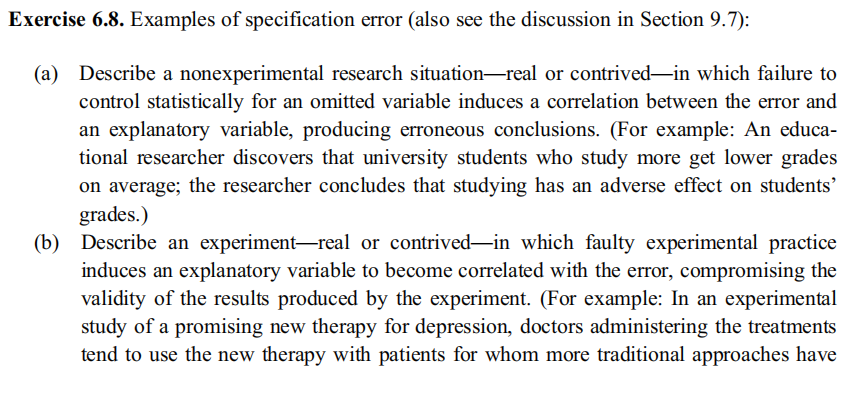
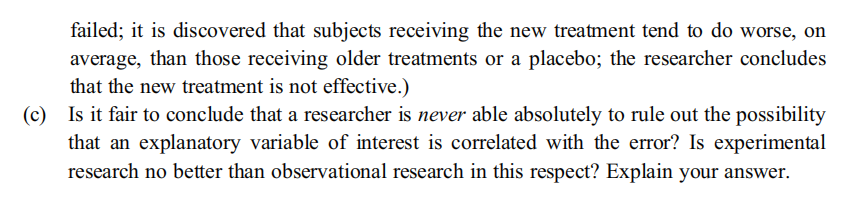

- a. A researcher discovered that prices of many houses in Texas is much more than in California. Thus, the reseacher concludes that the prices of houses in Texas is more expensive than in California. Obviously this conclusion is incorrect because the resercher didn't consider the size of the house, the concrete location of the house and the build year of the house etc other variables.

- b. A reasercher did a reseach to see if students study hard can have higher score or not. The reseacher asked two students to do an exam. One study hard but the other not. The result shows that both of them get 0 score so the reseacher think student study hard is not related to the score. Actually, the exam is too difficult that two students can't solve it. 

- c. No, it's not fair. Even though there're so many reasons will affect the result, only some of them have high correlation to the result. Thus, if the variance are enough to predict or conclude the target variance and have relatively lower error, the researcher still do a good job in the research. I don't think the experimental research is not better than observation research in this respect. Because they're all important in real life. We have to use a huge amount of observation with different variables to analyze and solve the problem. We also have to use experimental research to minimize the error and discover the reason behind it.

### Exercise D5.2

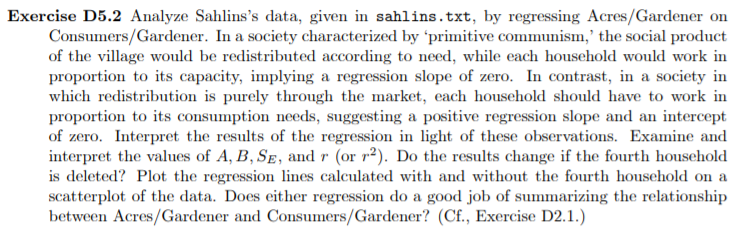

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (7,5)

In [2]:
df = pd.read_csv('https://socialsciences.mcmaster.ca/jfox/Books/Applied-Regression-3E/datasets/Sahlins.txt', delim_whitespace=True)
df.head(5)

consumers  acres
1       1.00   1.71
2       1.08   1.52
3       1.15   1.29
4       1.15   3.09
5       1.20   2.21

In [3]:
def reg_model(df, plot=True):
    x=df.consumers
    y=df.acres
    n = len(x)
    # using normal equation to minimize the cost function
    x_mean = np.mean(x)
    y_mean = np.mean(y)

    # Least Squares Estimators
    # partial derivative of b0 and b1 
    b1 = sum((x-x_mean)*(y-y_mean))/(sum((x-x_mean)**2))
    b0 = y_mean-b1*x_mean

    # calculate for data
    y_preds = b0 + b1*x
    
    if plot:
        # plot the regression line and scatter data
        plt.title('Regression')
        plt.xlabel('consumers')
        plt.ylabel('acres')
        plt.scatter(x,y,s=100,c='b',marker='o')
        plt.plot(x,y_preds,'g-')
        plt.show()

    return n, x, y, x_mean, y_mean, b0, b1, y_preds

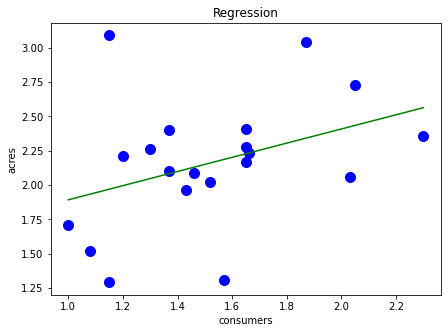

A = 1.3756445484797928
B = 0.5163200600920598
SE = 0.18415495900126555
R2 = 0.14111752046957265



In [4]:
n, x, y, x_mean, y_mean, b0, b1, y_preds = reg_model(df)
SE = np.sqrt(sum((y_preds-y_mean)**2)/(n-2))
RSS = sum((y-y_preds)**2)
TSS = sum((y-y_mean)**2)
RegSS = TSS-RSS
r_square = RegSS/TSS
print('A = %s\n'\
      'B = %s\n'\
      'SE = %s\n'\
      'R2 = %s\n' % (b0, b1, SE, r_square))

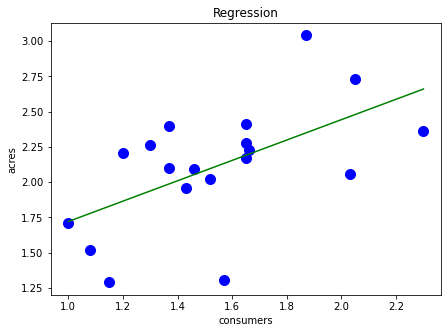

A = 1.0000039779982317
B = 0.7215941459581575
SE = 0.2562223171905366
R2 = 0.3264051395667763



In [5]:
n, x, y, x_mean, y_mean, b0, b1, y_preds = reg_model(df.drop(4,axis=0))
SE = np.sqrt(sum((y_preds-y_mean)**2)/(n-2))
RSS = sum((y-y_preds)**2)
TSS = sum((y-y_mean)**2)
RegSS = TSS-RSS
r_square = RegSS/TSS
print('A = %s\n'\
      'B = %s\n'\
      'SE = %s\n'\
      'R2 = %s\n' % (b0, b1, SE, r_square))

`Do the results change if the fourth household is deleted? `

Yes. The result of A, B, SE, and R square are changed after the fourth household is deleted. We can see the A is reduced and B is increased. But the standard error is increased and R2 is increased too. 


`Does either regression do a good job of summarizing the relationship between Acres/Gardener and Consumers/Gardener?`

Based on the results, both of the regressions have very low R square and have relatively high standard error. Thus, none of the regressions can do a good job of summarizing the relationship between Acres/Gardener and Consumers/Gardener.

### Exercise D6.2
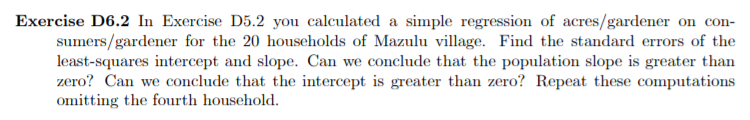

In [6]:
n, x, y, x_mean, y_mean, _, _, _ = reg_model(df,plot=False)
SE_B = SE/np.sqrt(sum((x-x_mean)**2))
SE_A = SE*np.sqrt(sum(x**2))/np.sqrt(n*sum((x-x_mean)**2))
print("SE of slope", SE_B)
print("SE of intercept", SE_A)

SE of slope 0.16932312780272665
SE of intercept 0.26416687188686466


We can see the standard error of slope is around 0.17 and the slope we found above is around 0.52. Thus the slope is greater than 0 even though the error goes maximum.

Similarly, we can see the standard error of intercept is around 0.26 and the intercept we found above is around 1.38. Thus the slope is intercept than 0 even though the error goes maximum.

In [7]:
n, x, y, x_mean, y_mean, _, _, _ = reg_model(df.drop(4,axis=0),plot=False)
SE_B = SE/np.sqrt(sum((x-x_mean)**2))
SE_A = SE*np.sqrt(sum(x**2))/np.sqrt(n*sum((x-x_mean)**2))
print("SE of slope", SE_B)
print("SE of intercept", SE_A)

SE of slope 0.17501228721252066
SE of intercept 0.27630450007322


We can see the standard error of slope is around 0.18 and the slope we found above is around 0.72. Thus the slope is greater than 0 even though the error goes maximum.

Similarly, we can see the standard error of intercept is around 0.28 and the intercept we found above is around 1.00. Thus the slope is intercept than 0 even though the error goes maximum.

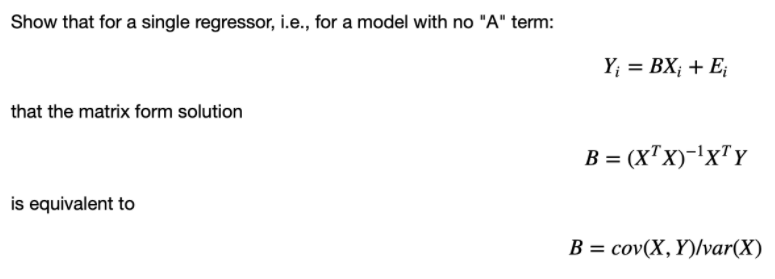

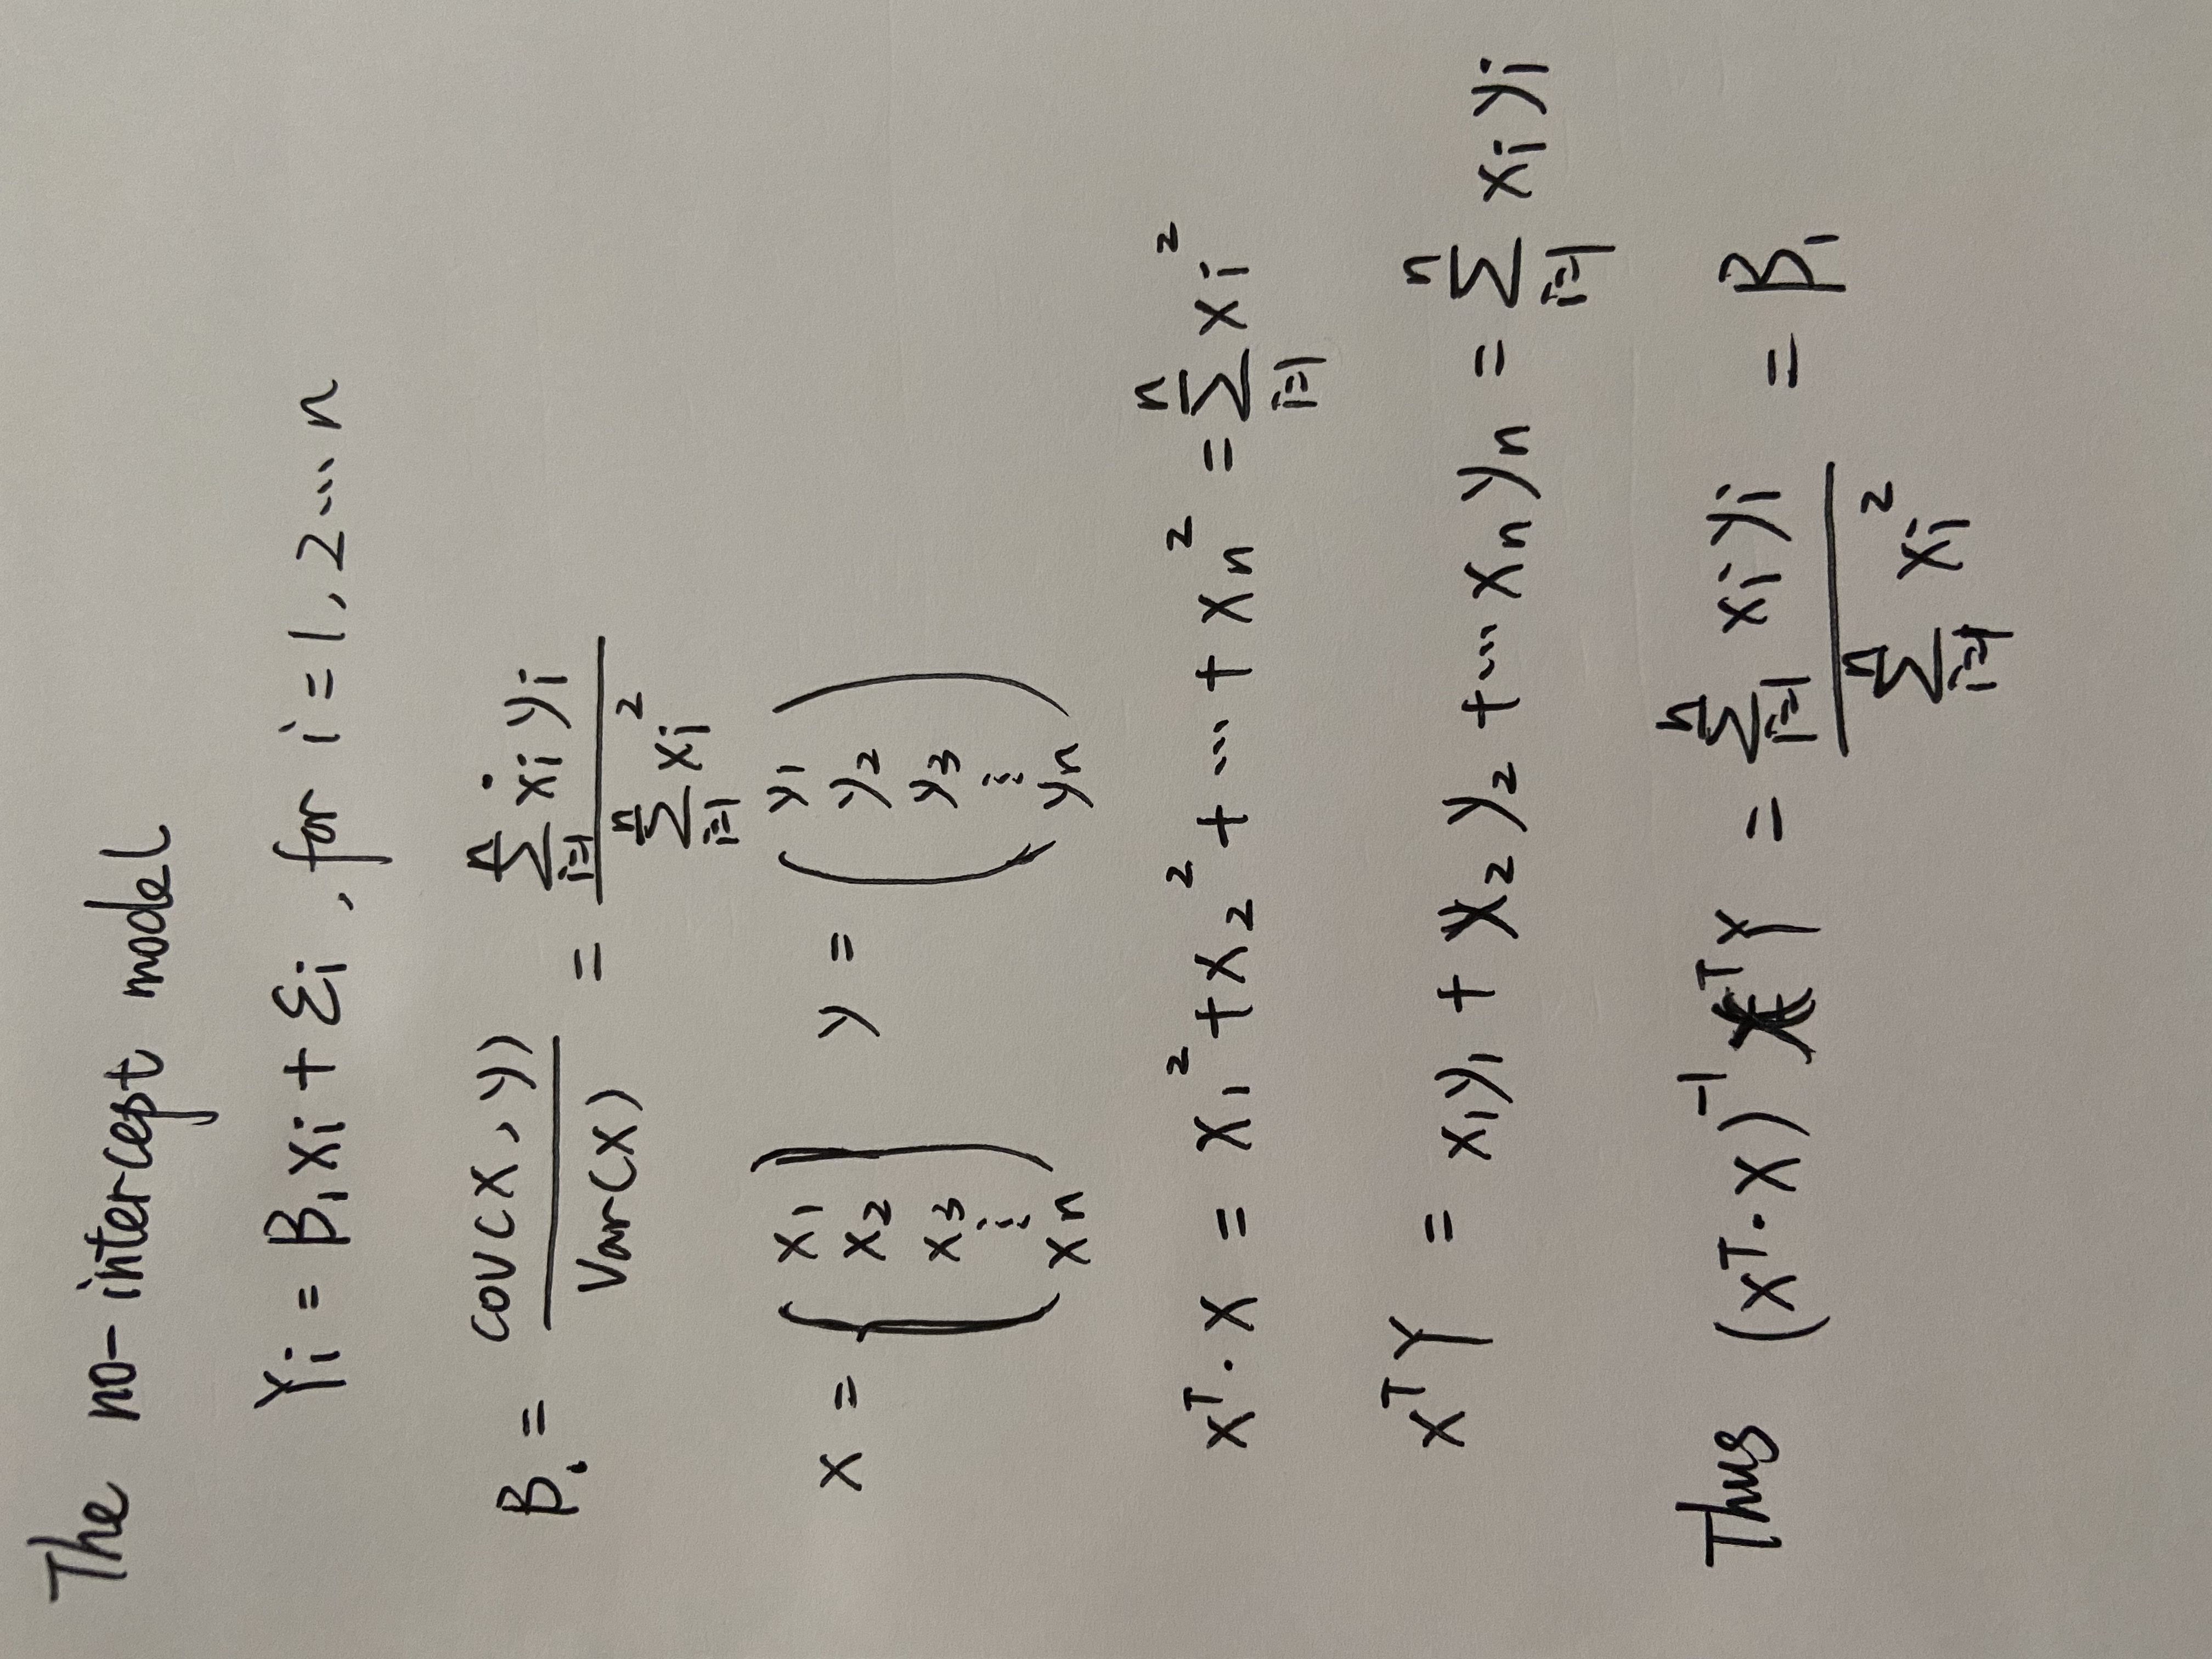